In this Notebook we are going to implement kmeans and Agglomerative clustering . Kmeans clustering divides our unlabeled dataset in to a k no of clusters which are given by the user. Agglomerative clusering has also same work like k means but it divides data on basis of hierachy . when our datasets is large than we can use k means and we dont have the idea of the no of cluster because k means randomly intilizes cluisters. agllomerative is best to use when we have ireggular data set insted of spherical.

In [344]:
#1st cell
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Rupeshbhardwaj002/Clustering_implementation_on_numerical_dataset/refs/heads/main/50_Startups.csv")
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [345]:
#2nd cell
df.isna().sum()
df = df.fillna(0)

Our dataset is a labeled dataset in which we have also the value of y with respective of x here we divided our y label("profit") from continous to binary dataset in two classes so we can show you our dataset is linear and simple divisible in 2 classes easily

In [346]:
#3rd cell
import numpy as np
df['Profit'] = df['Profit'].replace(',', '', regex=True)  # remove commas
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')  # convert to numeric
df['Profit'] = np.where(df['Profit'].astype(int) < 100000, 1, 0)
print(df)


    R&D Spend  Administration  Marketing Spend       State  Profit
0   165349.20       136897.80        471784.10    New York       0
1   162597.70       151377.59        443898.53  California       0
2   153441.51       101145.55        407934.54     Florida       0
3   144372.41       118671.85        383199.62    New York       0
4   142107.34        91391.77        366168.42     Florida       0
5   131876.90        99814.71        362861.36    New York       0
6   134615.46       147198.87        127716.82  California       0
7   130298.13       145530.06        323876.68     Florida       0
8   120542.52       148718.95        311613.29    New York       0
9   123334.88       108679.17        304981.62  California       0
10  101913.08       110594.11        229160.95     Florida       0
11  100671.96        91790.61        249744.55  California       0
12   93863.75       127320.38        249839.44     Florida       0
13   91992.39       135495.07        252664.93  California    

Here we have to label encode our columns /features that contains strings and char example - >  df["State"]

In [347]:
#4th cell
from sklearn.preprocessing import LabelEncoder, StandardScaler
labelen = LabelEncoder()
df['State'] = labelen.fit_transform(df['State'])
print(df.head())

   R&D Spend  Administration  Marketing Spend  State  Profit
0  165349.20       136897.80        471784.10      2       0
1  162597.70       151377.59        443898.53      0       0
2  153441.51       101145.55        407934.54      1       0
3  144372.41       118671.85        383199.62      2       0
4  142107.34        91391.77        366168.42      1       0


As we told clustering is a unsupervided learning algorithm that works on unlabeled data. So we transfered all the rows and features of the dataset df and leaving only y

In [348]:
#5th cell
x = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]

Here we have done standard scaling because some of our feature are in big range vs some in very little range hence for better results it is recommended to do standard scaling

In [349]:
#6th cell
standard = StandardScaler()
x_scaled = standard.fit_transform(x)
#print(scaled_df)

so we have around 4 features but clustering works better on two dimensional data hence we are using priciple component analysis to reduce sixze of our dataset in to 2 columns x,y

In [350]:
#7th cell
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_scaled)
print(x_reduced)

[[ 3.1562445  -0.2268596 ]
 [ 2.66355585  0.84912975]
 [ 2.17222475 -1.03425175]
 [ 2.21810299 -0.66247993]
 [ 1.69945118 -1.28050214]
 [ 1.78124826 -1.26596042]
 [ 0.46634468  1.40178322]
 [ 1.66362408  0.62462337]
 [ 1.66698042  0.48419047]
 [ 0.9950943  -0.3171258 ]
 [ 0.46030362 -0.36858919]
 [ 0.22324311 -0.78661795]
 [ 0.56635878  0.13682515]
 [ 0.41091488  0.66705583]
 [ 1.21089476  1.13774378]
 [ 1.11770022 -0.28718581]
 [ 0.16154399  0.15494618]
 [ 1.08177979  0.39629128]
 [ 0.6890519  -0.41209562]
 [-0.53732385  1.32076794]
 [ 0.26856813 -0.1864906 ]
 [ 0.98522978  0.62925709]
 [ 0.52079044 -0.16379078]
 [ 0.30959692 -0.7484933 ]
 [-0.29043982 -0.84021865]
 [-0.61281909  1.0338151 ]
 [-0.2380594   0.94647137]
 [ 1.00004783 -0.37378915]
 [-0.199287    2.26787484]
 [-0.27464915  1.03192885]
 [-0.87926197  0.06952461]
 [-0.44991269  1.05882757]
 [-1.20878297  0.8959823 ]
 [-0.39009594 -0.64657142]
 [-0.36822354  1.45406237]
 [-0.5135802  -1.50751257]
 [-0.71122471  0.15901856]
 

in this cell we used kmeans clustering now labels have stored which point belongs to which cluster

In [351]:
#8th column
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(x)

c = labels here 'c' means colour it will colour each value according to its label

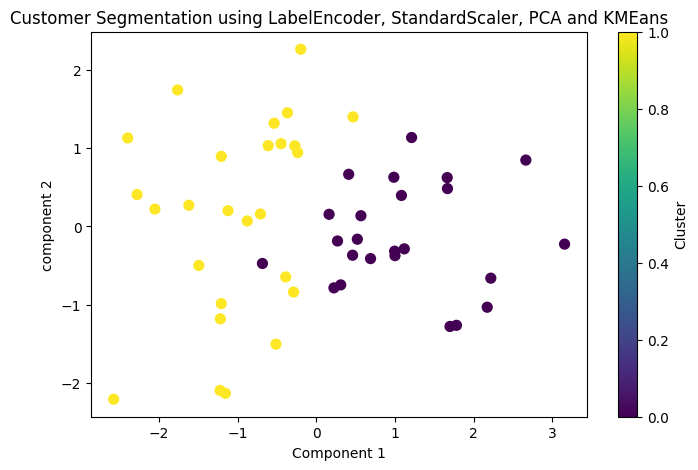

In [352]:
#9th cell
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
x = x_reduced[:,0]
y = x_reduced[:,1]
plt.scatter(x,y, c = labels, s=50)
plt.title("Customer Segmentation using LabelEncoder, StandardScaler, PCA and KMEans")
plt.xlabel("Component 1")
plt.ylabel("component 2")
plt.colorbar(label = 'Cluster')
plt.show()

Linkage divideds our dataset into hierachy step by step. dendogram is the graph of that linkage used to visualize hiearchy both are imported using scipy.cluster.hierachy

In [353]:
#10 cell
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(x_reduced, method='complete')
#print(link)


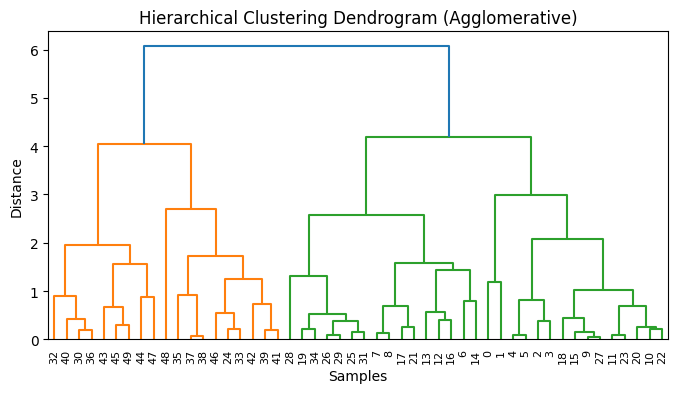

In [354]:
#11 th
plt.figure(figsize=(8,4))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram (Agglomerative)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

Now wee have the agglomerative clustering its implementation is same like the k means . if we dont want to visualize the dendogram we can directly implement this

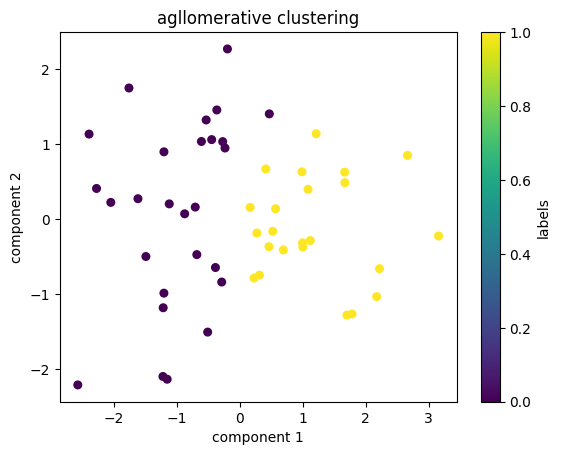

In [355]:
#12thcell
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(x_reduced)


plt.scatter(x_reduced[:,0], x_reduced[:,1], c=labels, s=30)
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar(label="labels")
plt.title("agllomerative clustering")
plt.show()